In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
prev_outs = os.listdir('toydata/output')

In [241]:
total_time = float(input('total_time (s) [480]: ') or 480)
sampling_freq = float(input('sampling_freq (Hz) [60]: ') or 60)
num_cells = int(input('num_cells [16]: ') or 16)
custom_name = str(input('custom_name [toydata]: '))
if custom_name =="" :
    out_name = "toydata" + str(len(prev_outs))
else:
    if custom_name + ".csv" in prev_outs:
        out_name = custom_name + str(prev_outs.count(custom_name + ".csv") + 1)
    else:
        out_name = custom_name
total_steps = int(round(total_time * sampling_freq))
print("Total steps to generate: %d" %total_steps)
print("Name of file: /output/%s.csv" %out_name)

total_time (s) [480]: 
sampling_freq (Hz) [60]: 
num_cells [16]: 
custom_name [toydata]: 
Total steps to generate: 28800
Name of file: /output/toydata1.csv


In [242]:
# max_loc_s = 0.005 #m/s
# max_deg_v = 0.02*np.pi #rad/s

def move_the_rat(max_loc_s,max_deg_v,total_steps,sampling_freq):
    head_dir = 2*np.pi*np.random.rand() #initialise in a random direction
    loc = 1*np.random.rand(2) #
    move_rat = np.zeros([3,total_steps])
    for step in range(total_steps): #for each step
        if step % sampling_freq == 0: #every second
            deg_v = (np.random.rand() - 0.5) * max_deg_v #update deg_v
            loc_s = np.random.rand() * max_loc_s #update loc_s
        new_head_dir = head_dir + deg_v
        if (loc[0] < 0) or (loc[1] < 0) or (loc[0] >1) or (loc[1]>1):
            new_head_dir = new_head_dir + np.pi 
        if new_head_dir > 2*np.pi:
            new_head_dir = new_head_dir - 2*np.pi
        if new_head_dir < 0:
            new_head_dir = 2*np.pi + new_head_dir
        head_dir = new_head_dir
        new_loc = loc + (loc_s*np.sin(head_dir),loc_s*np.cos(head_dir))
        move_rat[0,step] = new_head_dir
        move_rat[1,step] = new_loc[0]
        move_rat[2,step] = new_loc[1]
        loc = new_loc
    return move_rat

move_rat = move_the_rat(0.005, (0.02*np.pi),total_steps,sampling_freq)

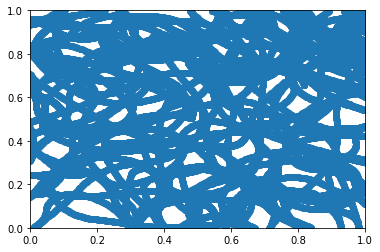

In [243]:
plt.figure()
plt.scatter(move_rat[1],move_rat[2],)
plt.axis([0, 1, 0, 1])
plt.show()

In [244]:
num_place_cells = np.random.randint(0,num_cells)
num_headdir_cells = np.random.randint(0,(num_cells-num_place_cells))
#num_pl_hd_cells = np.random.randint(0,(num_cells-(num_headdir_cells+num_place_cells)))
num_rand_cells = num_cells - (num_place_cells+num_headdir_cells)#+num_pl_hd_cells)

In [245]:
def place_cell(num_c,move_rat):
    cell_out=np.zeros([num_c,move_rat.shape[1]])
    for j in range(num_c):
        focus = np.random.rand(2)
        for i in range(move_rat.shape[1]):
            rat_now = move_rat[1:,i]
            dist = np.linalg.norm(rat_now - focus)
            cell_out[j,i] = int(round(dist*np.random.chisquare(2)))
    return cell_out
def head_cell(num_c,move_rat):
    cell_out=np.zeros([num_c,move_rat.shape[1]])
    for j in range(num_c):
        focus = 2*np.pi*np.random.rand()
        for i in range(move_rat.shape[1]):
            rat_now = move_rat[0,i]
            dist = np.linalg.norm(rat_now - focus)
            cell_out[j,i] = int(round(dist*np.random.chisquare(2)))
    return cell_out
def rand_cell(num_c,move_rat):
    cell_out=np.zeros([num_c,move_rat.shape[1]])
    for j in range(num_c):
        for i in range(move_rat.shape[1]):
            cell_out[j,i] = np.random.randint(0,10)
    return cell_out

In [246]:
head_out = head_cell(num_headdir_cells,move_rat)
place_out = place_cell(num_place_cells,move_rat)
rand_out = rand_cell(num_rand_cells,move_rat)

In [247]:
the_output = np.concatenate((move_rat,head_out,place_out,rand_out),axis=0)

In [251]:
#%%!np.savetxt(out_name,the_output,delimiter=",")
output_df = pd.DataFrame(the_output)

In [256]:
output_df.to_csv("toydata/output/%s.csv"%(out_name))

In [255]:
out_name

'toydata1'